In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [27]:
# Default Matplotlib Plot of Dataframe Column 
def dfplot(df, col, cond_col="", cond_val=0):
    if cond_col != "":
        c = df[df[cond_col] == cond_val]
        s = c[pd.isnull(c[col]) == False][col]
    else:
        s = df[pd.isnull(df[col]) == False][col]
    s.plot(figsize=(15,5))
    plt.title(col)
    plt.show()

# Sum of Dataframe Column
def dfsum(df, col, cond_col="", cond_val=0):
    if cond_col != "":
        total = df[df[cond_col] == cond_val][col].sum()
    else:
        total = df[col].sum()
    return total

# Matplotlib Histogram of Value Counts in Dataframe Column
def dfplotvc(df, col, cond_col="", cond_val=0):
    if cond_col != "":
        vc = df[df[cond_col] == cond_val][col].value_counts()
    else:
        vc = df[col].value_counts()
    plt.clf()
    plt.figure(figsize=(15,8))
    vc.plot(kind='bar')
    plt.show()  

# Interactive Bokeh Plot of Dataframe Column
# ... note that x axis is a recreated list of item number
# ... and does not reflect original index in dataframe
def dfbokeh(df, col, cond_col="", cond_val=0):
    p = figure(title=col, plot_height=300, plot_width=600)
    if cond_col != "":
        c = df[df[cond_col] == cond_val]
        s = c[pd.isnull(c[col]) == False][col]
    else:
        s = df[pd.isnull(df[col]) == False][col]
    y = s.values
    x = [i for i in range(len(y))]
    r = p.line(x, y, color="#2222aa", line_width=3)
    show(p, notebook_handle=True)

# Creates a QtDialog for Opening a File (local only)
def openfile_dialog():
    from PyQt5 import QtGui
    from PyQt5 import QtGui, QtWidgets
    app = QtWidgets.QApplication([dir])
    fname = QtWidgets.QFileDialog.getOpenFileName(None, "Select a file...", '.', filter="All files (*)")
    return fname

In [7]:
# Run `bin/sigview datasrv.lua <json file>` prior to executing any cell after this

In [ ]:
# For environments that support Qt Dialog run the following
#   execute the lines below to select a file that is read into the dataframe

# csvfile = openfile_dialog()
# df = pd.read_csv(csvfile[0])

In [8]:
# For environments that support local file access
#   copy the desired data file into the same directory as this ipynb notebook as "datainput.csv"
#   then execute the line below to read the file into the dataframe

df = pd.read_csv("datainput.csv")

In [40]:
df.head()

,Index,SciHist[1].TYPE,SciHist[1].SIGPES,SciHist[1].SIGRNG,SciHist[1].BKGND
0,4099441,4.0,-0.017857,3.368884e+06,1.214286
1,4099442,4.0,-0.015000,3.368805e+06,1.300000
2,4099443,4.0,0.042143,3.368790e+06,0.714286
3,4099444,4.0,-0.875000,3.368514e+06,6.000000
4,4099445,4.0,0.115000,3.368752e+06,0.750000


In [41]:
df.tail()

,Index,SciHist[1].TYPE,SciHist[1].SIGPES,SciHist[1].SIGRNG,SciHist[1].BKGND
6051,4105486,4.0,-0.035909,3.385808e+06,1.454545
6052,4105487,4.0,-0.016923,3.385804e+06,1.384615
6053,4105488,4.0,0.350000,3.386944e+06,0.000000
6054,4105489,4.0,-0.043333,3.388205e+06,1.666667
6055,4105490,4.0,0.275000,3.387001e+06,0.000000


In [10]:
df.describe()

,Index,SciHist[1].TYPE,SciHist[1].SIGPES,SciHist[1].SIGRNG,SciHist[1].BKGND
count,6.056000e+03,6051.000000,6052.000000,6.052000e+03,6052.000000
mean,4.102466e+06,4.092712,0.009031,3.377163e+06,0.210103
std,1.745854e+03,0.290052,0.048518,4.372673e+04,0.411792
min,4.099441e+06,4.000000,-1.125000,0.000000e+00,0.000000
25%,4.100955e+06,4.000000,0.005479,3.373291e+06,0.087671
50%,4.102468e+06,4.000000,0.009863,3.377816e+06,0.096022
75%,4.103976e+06,4.000000,0.014066,3.382049e+06,0.105769
max,4.105490e+06,5.000000,0.365000,3.388656e+06,6.500000


In [33]:
# Everything below this cell is for example use only #

In [34]:
# Useful to list longer slices of a dataframe
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

In [36]:
# Display a slice of dataframe
df[1:5]

,Index,SciHist[1].TYPE,SciHist[1].SIGPES,SciHist[1].SIGRNG,SciHist[1].BKGND
1,4099442,4.0,-0.015000,3.368805e+06,1.300000
2,4099443,4.0,0.042143,3.368790e+06,0.714286
3,4099444,4.0,-0.875000,3.368514e+06,6.000000
4,4099445,4.0,0.115000,3.368752e+06,0.750000


In [37]:
# Display all rows in dataframe that have certain values in them
# ... in this case, all rows where the type is 4.0
df[df["SciHist[1].TYPE"].isin([4.0])]

,Index,SciHist[1].TYPE,SciHist[1].SIGPES,SciHist[1].SIGRNG,SciHist[1].BKGND
0,4099441,4.0,-0.017857,3.368884e+06,1.214286
1,4099442,4.0,-0.015000,3.368805e+06,1.300000
2,4099443,4.0,0.042143,3.368790e+06,0.714286
3,4099444,4.0,-0.875000,3.368514e+06,6.000000
4,4099445,4.0,0.115000,3.368752e+06,0.750000
5,4099446,4.0,-0.055000,3.368793e+06,1.250000
6,4099447,4.0,0.205000,3.370623e+06,0.000000
7,4099448,4.0,0.250000,3.370670e+06,0.000000
8,4099449,4.0,-0.010000,3.370754e+06,1.100000
9,4099450,4.0,-0.225000,3.369202e+06,2.500000


In [38]:
# Display the sum of signal strength across the entire dataframe and when condition is met
print(dfsum(df, "SciHist[1].SIGPES"))
print(dfsum(df, "SciHist[1].SIGPES", "SciHist[1].TYPE", 5.0))

54.657595
6.8402840000000005


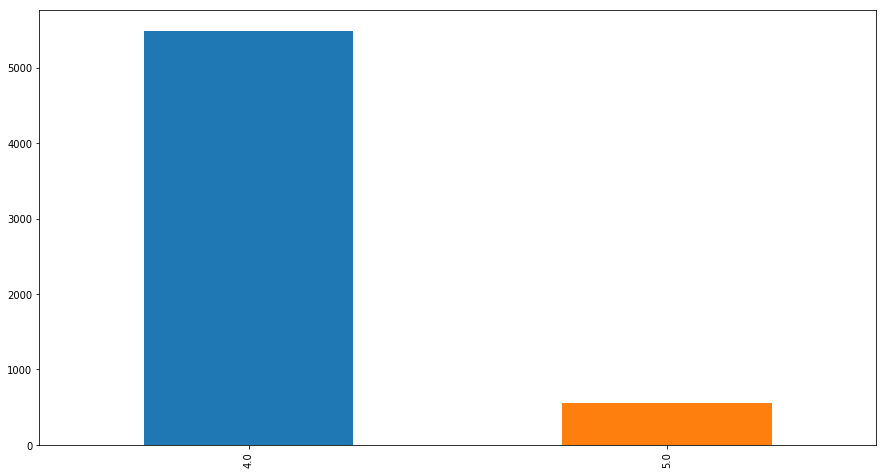

In [28]:
# Create a value count plot to see what kinds of values are present in the dataframe for a column
dfplotvc(df, "SciHist[1].TYPE")

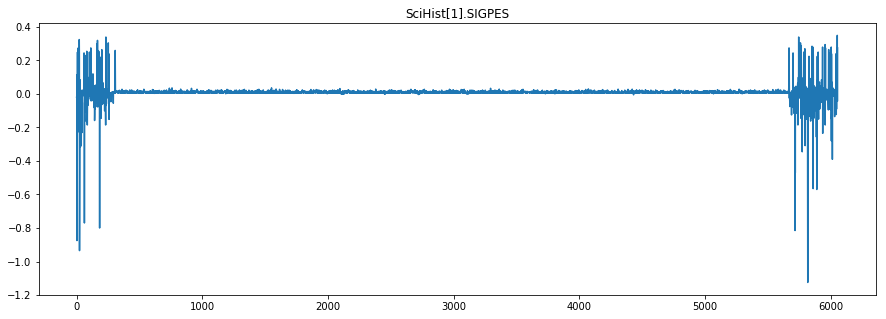

In [39]:
# Plot a column
dfplot(df, 'SciHist[1].SIGPES', 'SciHist[1].TYPE', 4)

In [30]:
# Create an interactive plot of a column
dfbokeh(df, 'SciHist[1].SIGPES', 'SciHist[1].TYPE', 5)